In [201]:
import numpy as np
from scipy import ndimage

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from tqdm.notebook import trange, tqdm

In [219]:
class GreyScottSimulator:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.grid_A = np.ones((X,Y))
        self.grid_B = np.zeros((X,Y))
        self.lp_kernel = np.array([[0.05, 0.2, 0.05],[0.2,-1,0.2],[0.05, 0.2, 0.05]])
        self.rng = np.random.default_rng()
        return

    def seed(self):
        i0 = int(self.rng.random() * self.X-1)
        j0 = int(self.rng.random() * self.Y-1)
        for i in range(int(self.X/10)):
            for j in range(int(self.Y/10)): 
                self.grid_B[i0+i][j0+j] = 1
                self.grid_A[i0+i][j0+j] = 0
        return

    def laplace(self, grid):    
        return ndimage.convolve(grid, self.lp_kernel, mode="wrap", cval=0)

    def update(self, dA, dB, fA, kB):
        a = self.grid_A
        b = self.grid_B
        self.grid_A = a + (dA * self.laplace(a) - a * b * b + fA * (1 - a))
        self.grid_B = b + (dB * self.laplace(b) + a * b * b - (kB + fA) * b)
        return
    
    def simulate(self, iterations, dA, dB, fA, kB):
        for i in trange(iterations):
            self.update(dA, dB, fA, kB)
        return

    def show(self):
        ax1 = plt.subplot(111)
        plt.imshow(g.grid_B, cmap='Greys',  interpolation='nearest')
        plt.show()
        return

    def animate(self, iterations, dA, dB, fA, kB):
        fig, ax = plt.subplots()
        ax.imshow(g.grid_B, cmap='Greys',  interpolation='nearest')

        def update(i):
            self.update(dA, dB, fA, kB)
            ax.imshow(g.grid_B, cmap='Greys',  interpolation='nearest')
            return 
        
        ani = animation.FuncAnimation(fig, update, frames=iterations, interval=50)
        plt.show()
        return


In [222]:
dA = 1
dB = 0.5
fA = 0.055
kB = 0.062

g = GreyScottSimulator(300, 500)
g.seed()

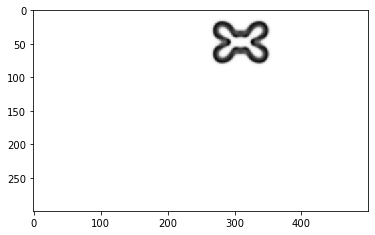

In [223]:
g.simulate(1000, dA, dB, fA, kB)
g.show()